In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  # print(token_list)
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

label.shape

--2020-12-24 13:30:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.28.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-12-24 13:30:36 (120 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



(15462, 3211)

In [32]:
model = Sequential()
model.add(tf.keras.layers.Embedding(total_words, 64, input_length = max_sequence_len-1))    # Your Embedding Layer)
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))   # An LSTM Layer)
model.add(tf.keras.layers.Dropout(0.2))                                                     # A dropout layer)
model.add(tf.keras.layers.LSTM(64))                                                         # Another LSTM Layer)
model.add(tf.keras.layers.Dense(total_words, activation = 'relu', kernel_regularizer='l1'))         # A Dense Layer including regularizers)
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))                         # A Dense Layer)
# Pick an optimizer
# Pick a loss function and an optimizer)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 10, 64)            205504    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 10, 128)           66048     
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_22 (Dense)             (None, 3211)              208715    
_________________________________________________________________
dense_23 (Dense)             (None, 3211)              10313732  
Total params: 10,843,407
Trainable params: 10,843,407
Non-trainable params: 0
_________________________________________

In [33]:
history = model.fit(predictors, label, epochs=500, verbose=1)

Epoch 1/500
484/484 [==============================] - 8s 10ms/step - loss: 13.3161 - accuracy: 0.0199
Epoch 2/500
484/484 [==============================] - 5s 10ms/step - loss: 6.8064 - accuracy: 0.0204
Epoch 3/500
484/484 [==============================] - 5s 10ms/step - loss: 6.7929 - accuracy: 0.0216
Epoch 4/500
484/484 [==============================] - 5s 10ms/step - loss: 6.7785 - accuracy: 0.0229
Epoch 5/500
484/484 [==============================] - 5s 10ms/step - loss: 6.8257 - accuracy: 0.0217
Epoch 6/500
484/484 [==============================] - 5s 10ms/step - loss: 6.7844 - accuracy: 0.0222
Epoch 7/500
484/484 [==============================] - 5s 10ms/step - loss: 6.8078 - accuracy: 0.0227
Epoch 8/500
484/484 [==============================] - 5s 10ms/step - loss: 6.7822 - accuracy: 0.0235
Epoch 9/500
484/484 [==============================] - 5s 10ms/step - loss: 6.7841 - accuracy: 0.0209
Epoch 10/500
484/484 [==============================] - 5s 10ms/step - loss: 6.80

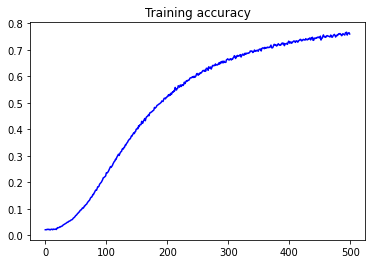

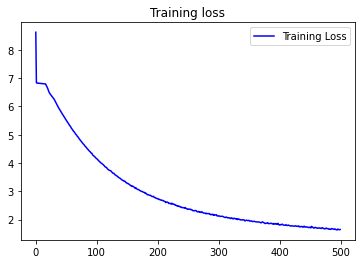

In [34]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [35]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope that fix'd respect boast rare room invent wrong write heaven's ' honour confounds single them when hell have there although thy sight common remain befits remembered forsaken night some turns be placed hath seem dead play bear spend kings accuse myself brand hearts green cruel told must write men he like many mourners ' room sing which green by lie upon another succession lies write dead it ' eye idolatry gone can men lived or increase are ask'd it have be which not thine own unkind pride of store doth grow seasons it make still loss some use mayst his
